In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Simple Dataset Creation

Let's create two groups that are slightly overlapping.

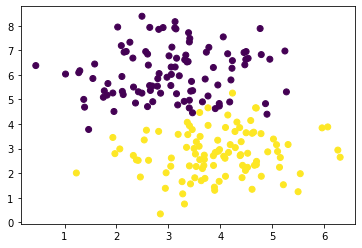

In [2]:
np.random.seed(0)

x1 = np.random.normal(loc=3.0, size=100)
y1 = np.random.normal(loc=6.0, size=100)
x2 = np.random.normal(loc=4.0, size=100)
y2 = np.random.normal(loc=3.0, size=100)

X = np.c_[np.concatenate((x1, x2)), np.concatenate((y1, y2))]
y = np.concatenate((-1*np.ones(100), 1*np.ones(100)))
plt.scatter(X[:,0], X[:,1], c=y)

## Perceptron Class

Let's implement the perceptron class.  It will have both train() and test() functions as in the algorithm described in class.  This time, let's update it so it doesn't reset the weights on each train call. Let's also create a predict() function in addition to test, and let's track accuracies.

In [7]:
class Perceptron:
    def __init__(self):
        self.w = np.zeros(len(X[0]))
        self.b = 0
        return
    
    def train(self, X, y, max_iter=100):
        accs = []
        for n in range(max_iter):
            for i in range(len(X)):
                a = np.dot(self.w,X[i])+self.b
                if (y[i]*a <= 0):
                    self.w += y[i]*X[i]
                    self.b += y[i]
            accs.append(accuracy_score(y,self.predict(X)))
        return accs
    
    def test(self, x):
        return np.sign(np.dot(self.w,x)+self.b)
    
    def predict(self, X):
        return np.array([self.test(x) for x in X])

## Train/Test Split and Meshgrid

Let's create the training and testing data and create the meshgrid for decision boundary creation.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

## Decision Boundaries

Let's create a decision boundary for every iteration to see how it changes during training.

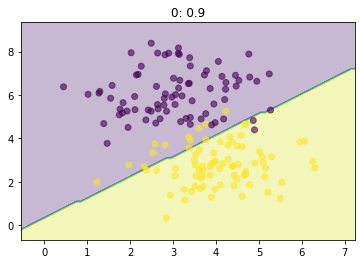

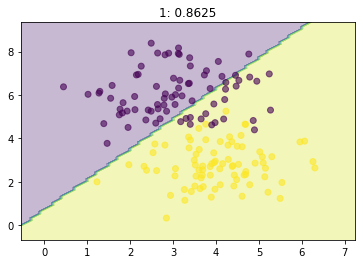

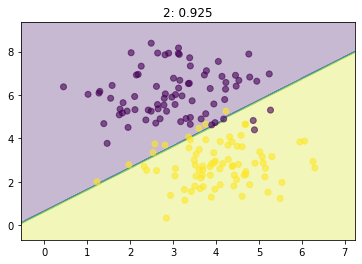

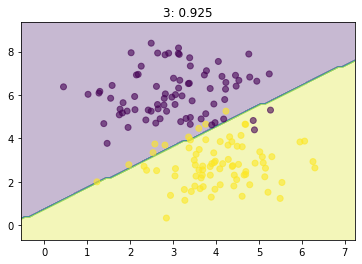

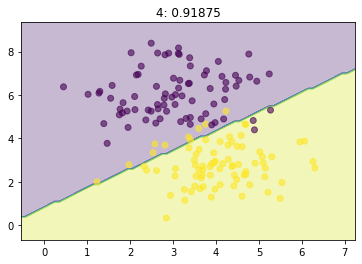

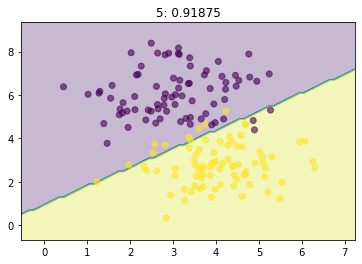

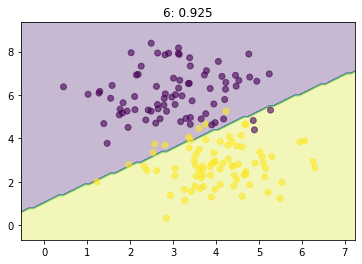

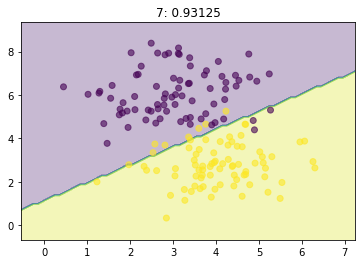

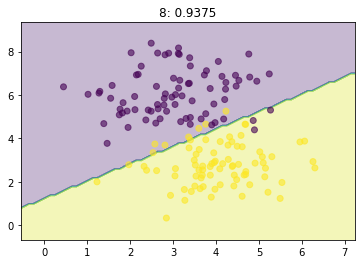

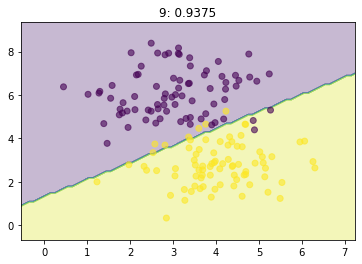

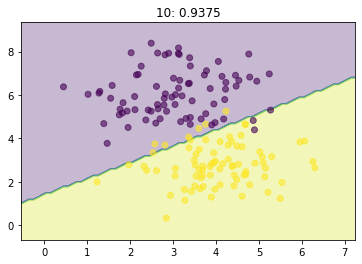

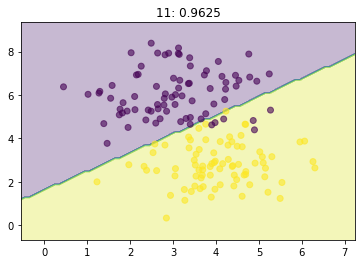

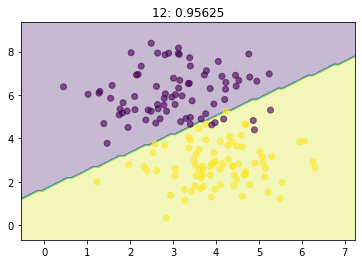

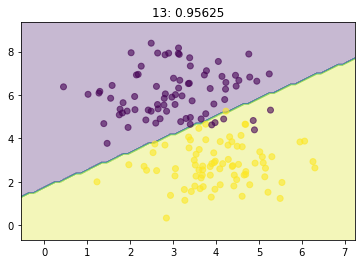

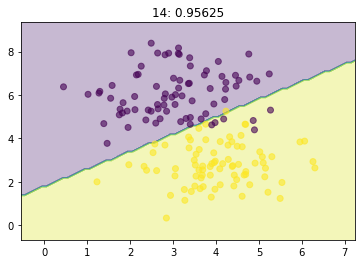

In [9]:
per = Perceptron()

for i in range(15):
    train_acc = per.train(X_train, y_train, max_iter = 1)
    Z = per.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:,0], X_train[:,1],c=y_train, alpha=0.6)
    plt.title(str(i) + ": " + str(train_acc[-1]))